<a href="https://colab.research.google.com/github/FerBarrey/An-lisis-cuantitativo-avanzados/blob/main/Ejercicio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejercicio 3
## Cargar la base
Para este segundo ejercicio se usa una base de precios de vuelos: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

In [118]:
import pandas as pd
import numpy as np

from google.colab import userdata
import json

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {
    'username': userdata.get('KAGGLE_USER'),
    'key': userdata.get('KAGGLE_KEY')}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d shubhambathwal/flight-price-prediction

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction
License(s): CC0-1.0
flight-price-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [119]:
# Extraigo todos los archivos que están en el .zip que acabamos de "bajar".

import zipfile
import os

os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

In [120]:
# Vamos a trabajar con el Clean Data Set
df = pd.read_csv('/content/Clean_Dataset.csv')

In [121]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [122]:
df.describe()


,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


# Preguntas

Pregunta 1: ¿Qué R2 se obtiene si se calcula una regresión lineal entre la duración del vuelo y su precio?

Ayuda:

Con statsmodels puede calcularse así:
```
import statsmodels.api as sm
mod = sm.OLS(df['price'], df['duration'])
res = mod.fit()
print(res.summary())
```

Con sklearn puede calcularse así:
```
from sklearn.linear_model import LinearRegression
X=['duration']
y=df['price']
reg = LinearRegression().fit(df[X],y)
reg.score(df[X], y)
```



In [124]:
import statsmodels.api as sm
mod = sm.OLS(df['price'], df['duration'])
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.435
Model:                            OLS   Adj. R-squared (uncentered):              0.435
Method:                 Least Squares   F-statistic:                          2.315e+05
Date:                Wed, 11 Sep 2024   Prob (F-statistic):                        0.00
Time:                        20:17:20   Log-Likelihood:                     -3.4427e+06
No. Observations:              300153   AIC:                                  6.885e+06
Df Residuals:                  300152   BIC:                                  6.885e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [125]:
from sklearn.linear_model import LinearRegression
X=['duration']
y=df['price']
reg = LinearRegression().fit(df[X],y)
reg.score(df[X],y)

0.04170677552839319

**Respuesta 1:** Utilizando sklearn se obtiene un R2 de 0.041, mientras que utilizando statsmodels el valor es 0.435. Mi pregunta es porque los modelos arrojan valores diferentes? Investigue y en este caso al parecer la diferencia se da porque en el modelo statsmodels no incluye la intercepcion por defecto.(en regresion lineal es el valor de la variable dependiente(y) cuando la variable independiente(x) es cero.) La intercepción se representa con el símbolo β0 en la ecuación de la recta:

y = β0 + β1x.

Segun lo investigado para que el modelo de statsmodels incluya la intercepcion por defecto se debe usar el siguiente codigo sm.add_constant(x)

A continuacion se realiza la comprobacion y se llega al mismo R entre los dos modelos:

In [126]:
import statsmodels.api as sm
mod = sm.OLS(df['price'], df['duration'])
x = sm.add_constant(df['duration'])
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.435
Model:                            OLS   Adj. R-squared (uncentered):              0.435
Method:                 Least Squares   F-statistic:                          2.315e+05
Date:                Wed, 11 Sep 2024   Prob (F-statistic):                        0.00
Time:                        20:17:20   Log-Likelihood:                     -3.4427e+06
No. Observations:              300153   AIC:                                  6.885e+06
Df Residuals:                  300152   BIC:                                  6.885e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Pregunta 2: realice un split de entrenamiento y testeo con el siguiente código:

```
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[X],y, test_size=0.2, random_state=1)
```

Calcule la regresión utilizando solamente los datos de entrenamiento:

```
reg = LinearRegression().fit(X_train,y_train)
```

¿Por qué difieren los R2 obtenidos para entrenamiento y para testeo?


```
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))
```





In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[X],y, test_size=0.2, random_state=1)

In [128]:
reg = LinearRegression().fit(X_train,y_train)


In [129]:
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))

0.04124567608448315
0.04353722037704899


**Respuesta 2:** ¿Por qué difieren los R2 obtenidos para entrenamiento y para testeo? El R2 para entrenamiento es de 0.041 y la de testeo es de 0.043. Conclusiones:En primer lugar se detecta que hay poca diferencia entre los 2 R2 , o sea se puede inferir que no se detecta tanto overfitting como underfitting. Por otro lado los dos valores son bajos(lejos del valor 1 ) con lo que podemos identificar que el modelo necesita más complejidad o sea añadir más variables predictoras.Un buen modelo siempre va a tener un R2 mas alto en testeo que en entrenamiento, este es el caso, pero como se detallo anteriormente arroja un valor muy bajo por lo que no está capturando bien la relación entre las variables. Otra causa se puede generar quizas por la baja relacion que existen entres las variables elegidas, quizas se podria probar con otras variables. Otra opción es modificar el rango del Test Size ( en el ejemplo 0.2)

Pregunta 3: ¿Si agregamos más avariables predictivas, qué va a pasar con el R2? Muéstrelo.

In [131]:
import statsmodels.api as sm
mod = sm.OLS(df['price'], df['duration'], df['departure_time'])
res = mod.fit()
print(res.summary())

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

**Respuesta 3:** ¿Si agregamos más avariables predictivas, qué va a pasar con el R2? Muéstrelo.Como se puede ver al agregar una variable mas  el codigo tira un error. Esto se explica porque el modelo detectó que la variable  no tiene valores numericos , es una  variable categorica por lo tanto el statsmodels no puede manejarlas directamente en regresiones deberiamos convertirlas a variables numericas.Para esto deberiasmos utilizar la codificacion one-hot que  convierten las variables categoricas agregandolas  en múltiples columnas binarias (de 0 y 1).

Pregunta 4: Algunas variables son categóricas y por tanto no se pueden incluir como predictoras. ¿Qué se podría hacer para incluirlas?

Ayuda:
Una idea podría ser convertir esas categorías en valores númericos. Pero piense que aveces las categorias respetan cierta "distancia", mientras que otras veces no. Esto puede hacerse con pandas así:


```
df['departure_time_cat']=df['departure_time'].astype('category').cat.codes
```

Otra idea sería generar variables dummys para cada una de las categorías. ¿Qué ventajas y desventajas tiene esto?



```
df=pd.get_dummies(df, columns=['departure_time'], drop_first=True)
```




In [132]:
#Utilizando el primer método de categorización
df['departure_time_cat']=df['departure_time'].astype('category').cat.codes



In [133]:
#Utilizando el primer método de categorización
import statsmodels.api as sm
x = df[['duration','departure_time_cat']]
mod = sm.OLS(df['price'], x)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.455
Model:                            OLS   Adj. R-squared (uncentered):              0.455
Method:                 Least Squares   F-statistic:                          1.252e+05
Date:                Wed, 11 Sep 2024   Prob (F-statistic):                        0.00
Time:                        20:18:12   Log-Likelihood:                     -3.4375e+06
No. Observations:              300153   AIC:                                  6.875e+06
Df Residuals:                  300151   BIC:                                  6.875e+06
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

**Respuesta 4:** Al utilizar el primer metodo de categorizacion( se agrego una  variable ) resulta en un mejoramiento en el valor final del R2 en este caso 0.455. La desventaja de utilizar el metodo get.dummies es que se agregan mas columnas en funcion de las categorias que tenga cada variable por lo que la dimensionalidad del modelo puede incrementarse significativamente impactando en la inestabilidad del ajuste en la regresion.

In [134]:
df=pd.get_dummies(df, columns=['departure_time'], drop_first=True)

In [135]:
#Utilizando el segundo método de categorización por medio de get_dummies.(En este caso al no poder resolver el error de ejecutar en anterior codigo se agrego las columnas para la variable departure time)

import statsmodels.api as sm
#x = df[['duration','departure_time_cat']]
X = df[['duration', 'departure_time_Early_Morning',    'departure_time_Evening',   'departure_time_Late_Night',    'departure_time_Morning',   'departure_time_Night']]
mod = sm.OLS(df['price'], x)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.455
Model:                            OLS   Adj. R-squared (uncentered):              0.455
Method:                 Least Squares   F-statistic:                          1.252e+05
Date:                Wed, 11 Sep 2024   Prob (F-statistic):                        0.00
Time:                        20:18:24   Log-Likelihood:                     -3.4375e+06
No. Observations:              300153   AIC:                                  6.875e+06
Df Residuals:                  300151   BIC:                                  6.875e+06
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

Pregunta 5:

Pregunta 5: Observe la siguiente situación


```
X=['duration', 'days_left', 'departure_time_cat',	'departure_time_Early_Morning',	'departure_time_Evening',	'departure_time_Late_Night'	,'departure_time_Morning',	'departure_time_Night']
X_train, X_test, y_train, y_test = train_test_split(df[X],y, test_size=0.2, random_state=1)
reg = LinearRegression().fit(X_train,y_train)
print(reg.score(X_test,y_test))

df['source_city_cat']=df['source_city'].astype('category').cat.codes
X=['source_city_cat','duration', 'days_left', 'departure_time_cat',	'departure_time_Early_Morning',	'departure_time_Evening',	'departure_time_Late_Night'	,'departure_time_Morning',	'departure_time_Night']
X_train, X_test, y_train, y_test = train_test_split(df[X],y, test_size=0.2, random_state=1)
reg = LinearRegression().fit(X_train,y_train)
print(reg.score(X_test,y_test))
```

Calculamos el R2 de testeo de una regresión con las variables que generamos. Luego, agregamos una variable más con un código que responde a la ciudad de origen. Pero al hacer esto último, el R2 no mejora. ¿Por qué?


In [136]:
X=['duration', 'days_left', 'departure_time_cat', 'departure_time_Early_Morning', 'departure_time_Evening', 'departure_time_Late_Night' ,'departure_time_Morning', 'departure_time_Night']
X_train, X_test, y_train, y_test = train_test_split(df[X],y, test_size=0.2, random_state=1)
reg = LinearRegression().fit(X_train,y_train)
print(reg.score(X_test,y_test))

df['source_city_cat']=df['source_city'].astype('category').cat.codes
X=['source_city_cat','duration', 'days_left', 'departure_time_cat', 'departure_time_Early_Morning', 'departure_time_Evening', 'departure_time_Late_Night' ,'departure_time_Morning', 'departure_time_Night']
X_train, X_test, y_train, y_test = train_test_split(df[X],y, test_size=0.2, random_state=1)
reg = LinearRegression().fit(X_train,y_train)
print(reg.score(X_test,y_test))

0.05211534725092348
0.0520907472923019


Respuesta 5: aqui se observa que tanto el R2 generado por testeo y entrenamiento del modelo no ha mejorado , es muy bajo y son similares. Una de las razones podria ser que la variable source_city quizás no tenga una relación fuerte con la variable objetivo del modelo(price).Se puede realizar un grafico de dispersion y de correlacion para analizar la variables detalladas.Como se puede observar source_city no tiene una relacion lineal fuerte con la variable price.El grafico de correlacion muestra una correlacion muy baja entre las dos variables. Por lo tanto podemos confirmar que source_city no es un buen predictor del precio.

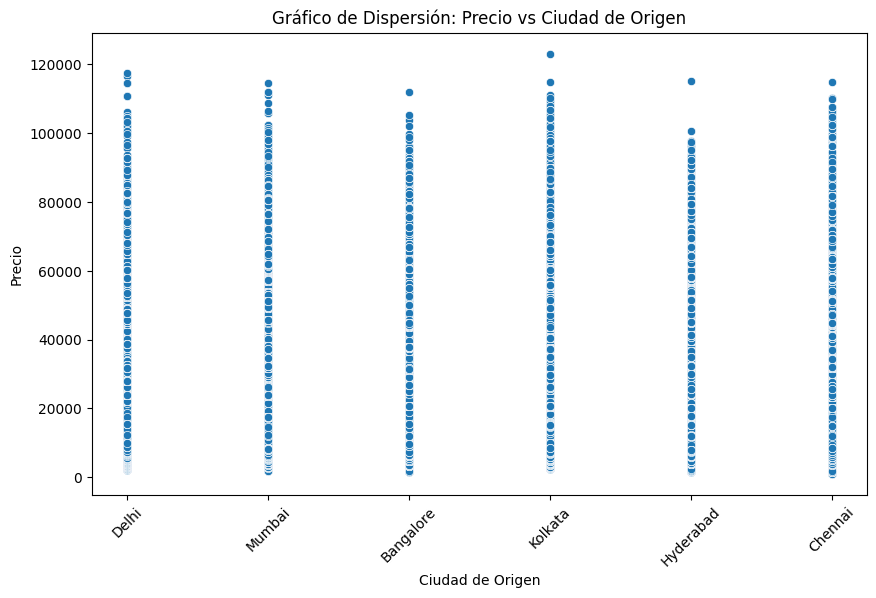

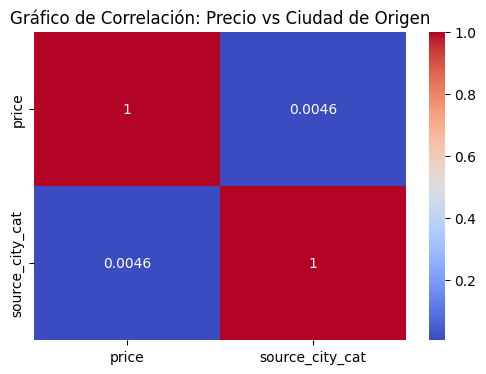

In [140]:
#Grafico de correlacion y de dispersion entre la variable price y source_city para determinar el nivel de relacion que existe

import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='source_city', y='price', data=df)
plt.title('Gráfico de Dispersión: Precio vs Ciudad de Origen')
plt.xlabel('Ciudad de Origen')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()

# Gráfico de correlación (heatmap)
correlation_matrix = df[['price', 'source_city_cat']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Gráfico de Correlación: Precio vs Ciudad de Origen')
plt.show()